# NOTEBOOK TO PREP THE PYTHON SCRIPT TO EXTRACT CATEGORIES ACROSS EDUCATIONAL CONTENT + SUB-TOPICS

### Testing BART c

In [ ]:
from transformers import pipeline
# Define the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


/Users/vivaberlenghi/opt/anaconda3/envs/ada/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Text to classify
text = "This video explains the basics of Python programming and coding."

# Define possible categories
candidate_labels = [
    "tutorial",
    "lecture",
    "explainer",
    "study tips",
    "experiment",
    "interview",
    "language learning",
    "professional development"
]

# Perform zero-shot classification
result = classifier(text, candidate_labels)

# Output the results
print(result)

{'sequence': 'This video explains the basics of Python programming and coding.', 'labels': ['explainer', 'language learning', 'tutorial', 'lecture', 'study tips', 'professional development', 'interview', 'experiment'], 'scores': [0.41810327768325806, 0.36327797174453735, 0.16819584369659424, 0.018065305426716805, 0.015120076946914196, 0.006956468801945448, 0.005774922203272581, 0.004506071098148823]}


### Imports

In [49]:
import os
import pandas as pd
from config import DRIVE_PATH_VIVA
import numpy as np
import random
import json
import gzip
import warnings
warnings.filterwarnings("ignore")

### Loading our data

In [3]:
video_file_path = os.path.join(DRIVE_PATH_VIVA, 'yt_metadata_en.jsonl.gz')

# loading
channels_df = pd.read_csv('data/df_channels_en.tsv', sep = "\t")
channels_df["join_date"] = pd.to_datetime(channels_df["join_date"])
print(channels_df.shape)

timeseries_df = pd.read_csv('data/df_timeseries_en.tsv', sep = "\t")
print(timeseries_df.shape)

(136470, 8)
(18872499, 10)


In [4]:
educational_dfs_names = os.listdir(os.path.join(DRIVE_PATH_VIVA, 'extracted_Education'))


In [8]:
edu_df = pd.read_csv(os.path.join(DRIVE_PATH_VIVA, 'extracted_Education', 'Education_videos_0.csv'))


In [ ]:
edu_dfs = [pd.read_csv(os.path.join(DRIVE_PATH_VIVA, 'extracted_Education', name)) for name in educational_dfs_names]

In [24]:
# check if channels corresponding to educational videos are themselves educational
edu_df1 = edu_dfs[0]
edu_df1.head(1)

,Unnamed: 0,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,category_cc_mapped,category_match
0,0,Education,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:36.933325,A video to teach the kids to Learn the Colors ...,3.0,jCaqrZ8gSkY,116,11.0,"learn colors,kids colors,colors kids,count to ...",Learn Colors and Count to Ten with Colors Disn...,2016-05-03 00:00:00,2720.0,Gaming,False


In [25]:
channels_df.head(1)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087


In [36]:
# Create a dictionary mapping channel to category_cc from df2
category_map = channels_df.set_index('channel')['category_cc'].to_dict()

# Map the category_cc to df1 based on channel id
for edu_df in edu_dfs:
    edu_df['category_cc_mapped'] = edu_df['channel_id'].map(category_map)



In [38]:
categories = ['Autos & Vehicles',
    'Comedy',
    'Education',
    'Entertainment',
    'Film & Animation',
    'Gaming',
    'Howto & Style',
    'Music',
    'News & Politics',
    'Nonprofits',
    'People & Blogs',
    'Pets & Animals',
    'Science & Technology',
    'Sports',
    'Travel & Events']
counts_df = pd.DataFrame(index=categories)

for i, edu_df in enumerate(edu_dfs):
    # Get the counts for the current dataframe, fill missing categories with 0
    counts = edu_df['category_cc_mapped'].value_counts().reindex(categories, fill_value=0)
    # Add the counts as a new column
    counts_df[f'df_{i}'] = counts

In [39]:
display(counts_df)

,df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7
Autos & Vehicles,852,694,481,1450,5982,2565,2798,921
Comedy,1110,633,620,514,1261,731,658,674
Education,393266,403835,403066,391547,378759,388848,400614,384771
Entertainment,19121,20047,14785,13884,25513,20445,12692,18263
Film & Animation,0,0,0,0,0,0,0,0
Gaming,2529,4463,3744,1600,3529,5005,2260,3262
Howto & Style,9926,8408,6918,13580,9644,11568,7624,9710
Music,4199,3998,6045,2607,3887,3043,3163,2320
News & Politics,9006,5813,4862,11456,8678,6886,12730,12821
Nonprofits,0,0,0,0,0,0,0,0


In [42]:
counts_df['total']= counts_df.sum(axis = 1)

In [ ]:
display(counts_df)



,df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,total
Autos & Vehicles,852,694,481,1450,5982,2565,2798,921,15743
Comedy,1110,633,620,514,1261,731,658,674,6201
Education,393266,403835,403066,391547,378759,388848,400614,384771,3144706
Entertainment,19121,20047,14785,13884,25513,20445,12692,18263,144750
Film & Animation,0,0,0,0,0,0,0,0,0
Gaming,2529,4463,3744,1600,3529,5005,2260,3262,26392
Howto & Style,9926,8408,6918,13580,9644,11568,7624,9710,77378
Music,4199,3998,6045,2607,3887,3043,3163,2320,29262
News & Politics,9006,5813,4862,11456,8678,6886,12730,12821,72252
Nonprofits,0,0,0,0,0,0,0,0,0


/var/folders/db/w7pcw26x5mx6wkrqhdrk5c9c0000gn/T/ipykernel_47871/2003146933.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y=counts_df_sorted.index, data=counts_df_sorted, palette='viridis')


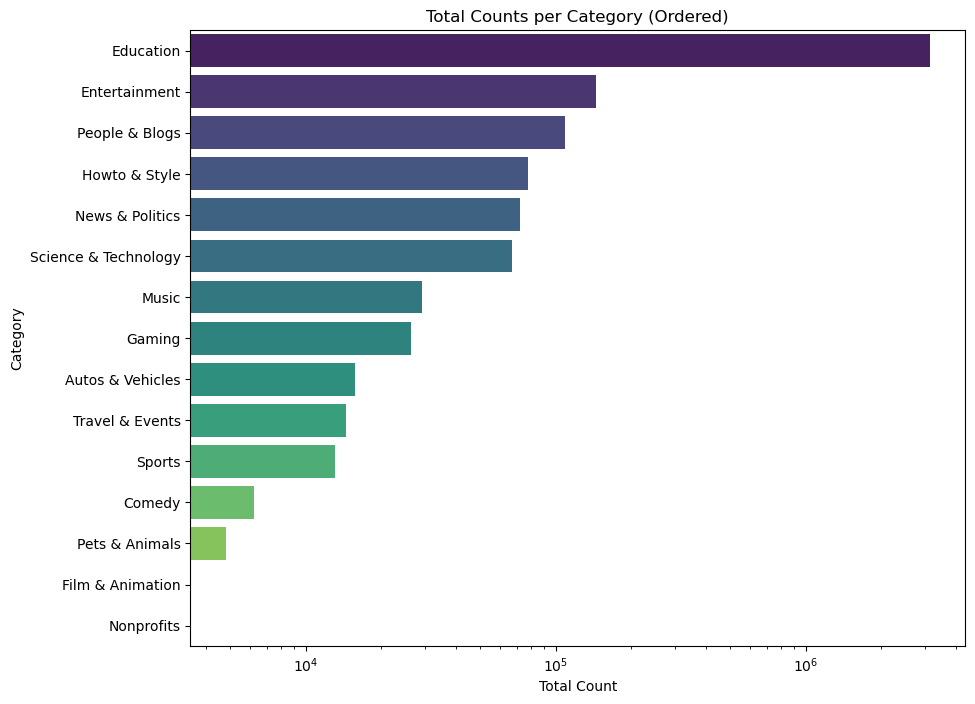

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'total' column in descending order
counts_df_sorted = counts_df.sort_values(by='total', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='total', y=counts_df_sorted.index, data=counts_df_sorted, palette='viridis')

# Adding title and labels
plt.title('Total Counts per Category (Ordered)')
plt.xscale('log')
plt.xlabel('Total Count')
plt.ylabel('Category')

# Show plot
plt.show()

In [50]:
#data exploration
# - plot for each category of channel the distrib of channels and amount of educational videos they posted
# - find the top 3 for all categories and plot it there
# - yann demandait: distrib de post educaitonnels sur l'histoire de la chaine


### Processing

In [ ]:
# extract titles and tags


In [ ]:
import re
df = pd.read_csv(os.path.join(video_file_path, f'{category}_video.csv'), index_col=0)

df['desc_clean'] = df['description'].fillna('')
df['text'] = df['title'].fillna('') + " " + df['tags'].fillna('') 

#sort the description separately since way more garbage, some titles contain facebook and twitter and others that we are interested to remove

pd.set_option('display.max_colwidth', 80)
df.sample(5)[['desc_clean', 'text']]
# 32379 crypto video with lots of links
# 35962 marseillaise
# 22678 41830 non alpha and indian
# 34547 numbers accolated
# 17337 very long strings in crypto vids
# 3235 hindu

df

In [ ]:
df[df['title'].str.contains('twitter')]['title']

In [ ]:
string = df['description'].iloc[5046].lower()
print(string)
remove_urls(string)#.replace('website', 'website blab bla truc muche promotion')

In [ ]:
# everything to lower case so that same words are treated the same
df['text'] = df['text'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['desc_clean'] = df['desc_clean'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
# remove urls links and their associated text
url_pattern = re.compile(r'(https?://\S+|www\.\S+)') 
com_pattern = re.compile(r'([^\s]+\.com)')
fb_pattern = re.compile(r'(facebook\s+page|facebook\s+group)[^\w\s]*.*?(\n|$)')
#lines that start with brands or websites 
link_pattern = re.compile(r'(\n+)(facebook|twitter|pinterest|tumblr|instagram|website|amazon)[^\w\s]*\s+\S+')
link_pattern2 = re.compile(r'(\n+)(facebook|twitter|pinterest|tumblr|instagram|website|amazon)')

#TODO lines that contain these websites in the middle of text - hard to implement since not sure if discard

long_words = re.compile(r'\b[a-zA-Z0-9]{21,}\b') # most words in english are below 20 letters, bigger than that is a crypto wallet id

def remove_urls(text, desc = False):
        text = url_pattern.sub('', text)
        text = com_pattern.sub('', text)
        text = long_words.sub('', text)
        if desc: # titles and tags should keep brand names since these might be the focus of the video
                text = fb_pattern.sub('', text)
                text = link_pattern.sub('', text)
                return link_pattern2.sub('', text)
        return text

df['desc_clean'] = df['desc_clean'].apply(remove_urls, desc = True)
df['text'] = df['text'].apply(remove_urls)
#test = 'https://www.youtube.com/everydaytacticalvids\n my twitter account - https://twitter.com/everydaytactic1\n my facebook group tha tha \n ow'
#remove_urls(test, True)

In [ ]:
def clean_non_word(text): #punctuation, underscores seem to evade this regex so add it
        return  re.sub(r'[^\w\s]|_+', ' ', text)

def clean_non_ascii(text): # indian symbols that might still be left
        return  re.sub(r'[^\x00-\x7F]+', ' ', text)

df['desc_clean'] = df['desc_clean'].apply(clean_non_word).apply(clean_non_ascii)
df['text'] = df['text'].apply(clean_non_word).apply(clean_non_ascii)

In [ ]:
def clean_numeric(text):
    return re.sub(r'\d+(?![a-zA-Z])', '', text) # numbers that are not accolated to strings : # TODO MAybe all numbers
df['desc_clean'] = df['desc_clean'].apply(clean_numeric)
df['text'] = df['text'].apply(clean_numeric)

In [ ]:
def clean_space_newline(text):
    return re.sub(r'\s{2,}', ' ', text.replace('\n', ' ')).strip()

df['desc_clean'] = df['desc_clean'].apply(clean_space_newline)
df['text'] = df['text'].apply(clean_space_newline)

In [ ]:
df['text_clean'] = df['text'] + " "+ df['desc_clean']
df = df.drop(['text', 'desc_clean'], axis = 1)
df.to_csv(op.join(DERIV, 'df_edu_500k_clean.csv'))

In [ ]:
#df= pd.read_csv(op.join(DERIV, 'df_edu_all_clean.csv'))
#optional : make it lighter 
df = df.drop(['description'], axis = 1)

In [ ]:
# no need to perform lemmatization, stemming or stopword removal since BERT handles it 

### Categorization

In [ ]:
trial = df#.copy().sample(5000)
pd.set_option('display.max_colwidth', 80)
trial = trial.reset_index()

# Try to extract sub topics with sentence BERt like transformer s
from sentence_transformers import SentenceTransformer # https://sbert.net/
from sklearn.cluster import KMeans


print('Encoding model...')
model = SentenceTransformer('all-MiniLM-L6-v2') 
embeddings = model.encode(trial.get('text_clean'))

# Step 2: Perform K-Means clustering
print('Starting kmeans...')
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

print('Fitting model...')
clusters = kmeans.fit(embeddings)
cluster_assignment = clusters.labels_

print('Predicting labels...')
trial['subcategories'] = clusters.predict(embeddings)